# Code-Beispiel: Lineare Regression

In diesem Notebook wollen wir mit Hilfe von linearer Regression Vorhersagen auf dem Advertising-Datensatz machen. Ziel ist es anhand von unterschiedlichen Features Vorhersagen über Erkaufserlöse ("Sales") zu machen.

### Laden des Advertising-Datensatzes

Zuerst laden wird die Daten aus der csv-Datei `advertising.csv` in einen Pandas Dataframe. Um den Inhalt zu prüfen,  schauen wir uns die ersten paar Zeilen mit Hilfe der `head` Funktion an.

In [4]:
import pandas as pd
data_raw = pd.read_csv("advertising.csv")
data_raw.head()

,index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Die `head` Funktion zeigt nur die ersten 5 Datenpunkte im Dataframe an. Um zu wissen wie viele Datenpunkte sich im Dataframe befinden, schauen wir auf das `shape` Attribut.

In [5]:
rows, cols = data_raw.shape
print("Dataframe hat " + str(rows) + " Datenpunkte.")
print("Dataframe hat " + str(cols) + " Spalten.")

Dataframe hat 200 Datenpunkte.
Dataframe hat 5 Spalten.


Die erste Spalte enthält lediglich einen fortlaufenden Index und wird für die Vorhersage nicht benötigt, sie kann daher entfernt werden.

In [6]:
data = data_raw.drop(columns=['index'])
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Als nächstes visualieren wir die Datenpunkte mit Hilfe der `matplotlib`-Library.
Dazu erstellten wir einen Plot, welcher auf der x-Achse die `TV`-Daten und auf der y-Achse die `sales`-Daten darstellt.

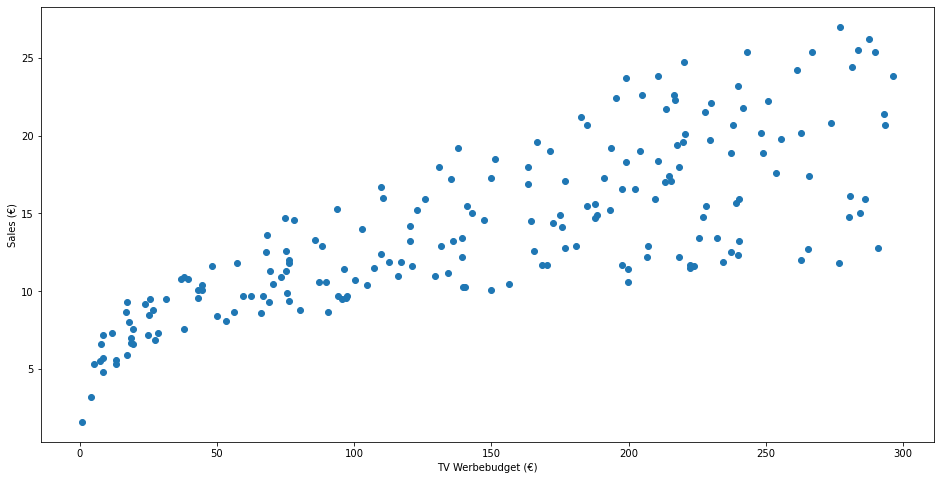

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(data['TV'], data['sales'])
plt.xlabel("TV Werbebudget (€)")
plt.ylabel("Sales (€)")
plt.show()

### Training der linearen Regression

Bevor wir mit dem Training beginnen, unterteilten wir die verfügbaren Daten in Trainings- und Testdaten, wobei die Trainingsdaten 80% der ursprünglichen Daten beinhalten sollen und die Testdaten 20%.

In [8]:
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index) # Remove all data in the index column

print('Trainingsdaten')
print(train_data.shape)
print('Testdaten')
print(test_data.shape)

Trainingsdaten
(160, 4)
Testdaten
(40, 4)


Anschließend trainieren wir auf den Trainingsdaten eine lineare Regression mit dem einen Feature `TV` und dem Label `sales`.

In [9]:
from sklearn.linear_model import LinearRegression

X_train = train_data['TV'].values.reshape(-1,1) # notwendig wenn nur ein Feature vorhanden ist
y_train = train_data['sales']
reg = LinearRegression()
reg.fit(X_train, y_train) # Praxis aus der Vorlesung

LinearRegression()

Die lineare Regression ist nun trainiert und das Modell in the `reg` variable verfügbar. Wir können uns nun die Funktionsgeraden ausgeben lassen.

In [10]:
print(f"Regressionsgerade: y = {reg.intercept_} + {reg.coef_[0]}*TV")

Regressionsgerade: y = 6.745792674540392 + 0.049503977433492635*TV


Mit dem gerade trainierten Modell können wir nun Vorhersagen auf Datenpunkten machen.

In [11]:
dataPoint = X_train[0] # erster Datenpunkt aus den Trainingsdaten
prediction = reg.predict(dataPoint.reshape(1, -1)) # Vorhersage auf Datenpunkt
print(f"Bei einem TV-Werbebudget von {dataPoint}€, werden {prediction}€ Umsatz erzielt")

Bei einem TV-Werbebudget von [69.2]€, werden [10.17146791]€ Umsatz erzielt


Mit dem Modell  machen wir nun Vorhersagen auf den Trainingsdaten, um zu visualiesieren wie die trainierte Regressionsgerade aussieht.

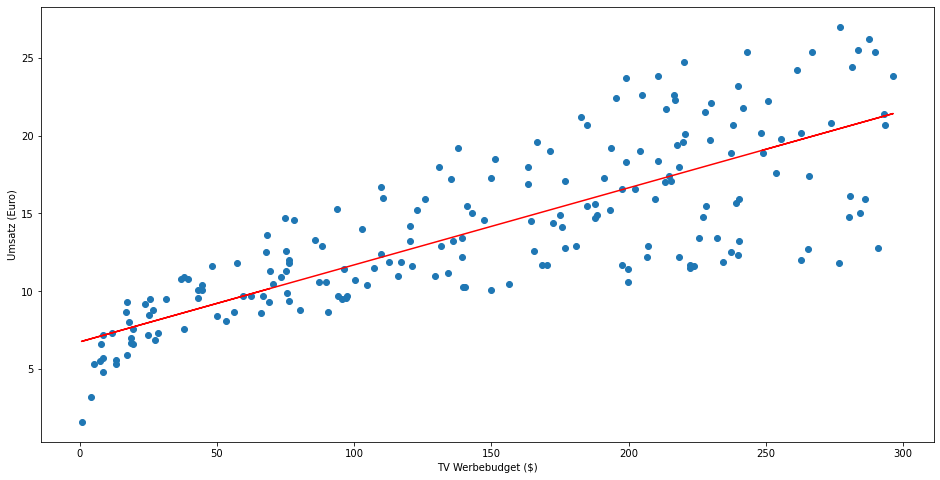

In [12]:
prediction_train = reg.predict(X_train) # Vorhersage auf allen Trainingsdaten zugleich

plt.figure(figsize=(16, 8))
plt.scatter(data['TV'], data['sales'])
plt.plot(X_train, prediction_train, 'r')
plt.xlabel("TV Werbebudget ($)")
plt.ylabel("Umsatz (Euro)")
plt.show()

### Testen des Regressionsmodells

Um die Qualität des trainierte Regressionsmodells zu überprüfen, machen wir damit Vorhersagen auf den Testdaten und messen den MSE.

In [14]:
from sklearn.metrics import mean_squared_error
X_test = test_data['TV'].values.reshape(-1,1)
y_test = test_data['sales']
prediction_test = reg.predict(X_test)
mse_test =  mean_squared_error(y_test, prediction_test)
print(f"Mean squared error (MSE) auf Testdaten: {mse_test}")

Mean squared error (MSE) auf Testdaten: 14.41037265386388


### Multidimensionale lineare Regression

Im zweiten Schritt erweitern wir die lineare Regression um die beiden Features `radio` und `newspaper`.

In [16]:
X_train = train_data.drop(columns = ['sales']) # alle Spalten außer Sales
y_train = train_data['sales']
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
print(f"Regression: Y = {reg_all.intercept_} + {reg_all.coef_[0]}*TV + {reg_all.coef_[1]}*radio + {reg_all.coef_[2]}*newspaper")

Regression: Y = 2.9008471054251572 + 0.04699763711005834*TV + 0.18228777689330944*radio + -0.0012975074726833274*newspaper


Abschließend nutzen wir das neuen Modell um wiederum Vorhersagen auf den Testdaten zu machen.

In [17]:
X_test = test_data.drop(columns = ['sales'])
y_test = test_data['sales']
predictions = reg_all.predict(X_test)
mse =  mean_squared_error(y_test, predictions)
print("Mean squared error (MSE) auf Testdaten: %.2f" % mse)

Mean squared error (MSE) auf Testdaten: 3.16


Wie wir sehen können ist die Vorhersage für das multidimensionale Modell besser als die normale lineare Regression (der MSE ist wesentlich kleiner). Das Hinzufügen der neuen Features verbessert also die Vorhersagekraft des Modells. 